# **Data Analysis**

#### This file analyses the data to check for various characteristics 




In [24]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from Bio import SeqIO
from Bio.SeqUtils import GC

### **K-mer data analyses**

In [26]:
# This analysis code is common for all the k-mers.
#  For analyses of different k-mers just change the file name and run the same code.
# eg- change "Data/k(5)mer_data.csv" to "Data/k(6)mer_data.csv" for hexamer analyses.
data = pd.read_csv(r"C:\Users\anant\Documents\GitHub\Taxonomic_classifier\Data\k(7)mer_data.csv").drop("Unnamed: 0", axis=1)

In [27]:
data.describe()

,AAAAAAA,AAAAAAT,AAAAAAC,AAAAAAG,AAAAATA,AAAAATT,AAAAATC,AAAAATG,AAAAACA,AAAAACT,...,GGGGGTC,GGGGGTG,GGGGGCA,GGGGGCT,GGGGGCC,GGGGGCG,GGGGGGA,GGGGGGT,GGGGGGC,GGGGGGG
count,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,...,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000,13252.000000
mean,0.012979,0.014639,0.015696,0.010640,0.017507,0.005961,0.006716,0.011395,0.006942,0.018488,...,0.029882,0.076215,0.162013,0.099004,0.775430,0.083685,0.127981,0.293842,0.056746,0.037428
std,0.150407,0.140388,0.129066,0.106217,0.137338,0.097717,0.083506,0.106848,0.088319,0.134712,...,0.172033,0.271258,0.398582,0.318013,0.449694,0.317311,0.370294,0.462933,0.254657,0.215159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,8.000000,4.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,4.000000,2.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000


<AxesSubplot:title={'center':'Frequency of AAAAAAA kmer across sequences'}, xlabel='Sequences', ylabel='Occurance'>

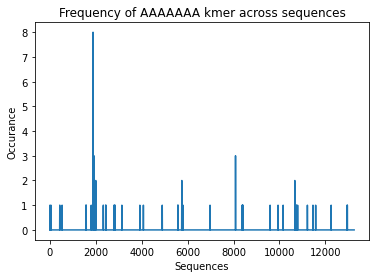

In [28]:

data[data.columns[0]].plot(title="Frequency of {} kmer across sequences".format(data.columns[0])
, xlabel="Sequences", ylabel="Occurance")
# the following graph shows the distribution of the first k-mer of 'A'(adenosine) repeats present across the 13252 sequences
# the variability of the k-mer across sequences shows that it can be used for prediction

In [29]:

values = data.values.reshape(1, data.values.size)
unique, counts = np.unique(values, return_counts=True)
# converting counts to ratios
counts = counts/counts.sum()


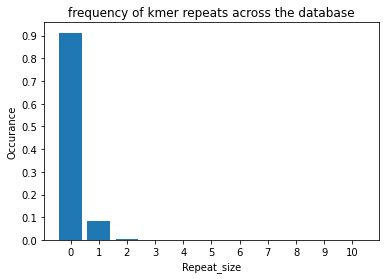

In [30]:
fig, ax = plt.subplots()
plt.title("frequency of kmer repeats across the database")
plt.xlabel('Repeat_size')
plt.ylabel("Occurance")
ax.set_xticks(np.arange(0,max(unique)+1, 1))
ax.set_yticks(np.arange(0,max(counts), 0.1))
plt.bar(unique, counts)
plt.show()

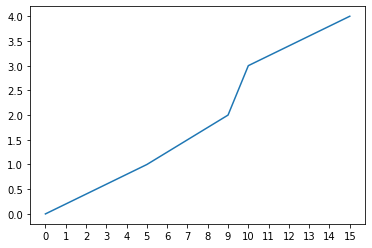

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = [0,5,9,10,15]
y = [0,1,2,3,4]
fig, ax = plt.subplots()
ax.plot(x,y)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 1))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
plt.show()

### **Taxonomy data analysis**

In [32]:
data = pd.read_csv(r"C:\Users\anant\Documents\GitHub\Taxonomic_classifier\Data\Taxonomic_data.csv")

In [33]:
data.describe()

,ID,Strain,Domain,Phylum,Class,Order,Family,Genus,Species
count,13252,13252,13252,13252,13252,13252,13252,13252,13252
unique,13252,6444,2,37,72,145,306,924,2621
top,NC_009925_01,Rhodospirillum photometricum DSM 122,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia,Escherichia coli
freq,1,17,12990,6111,4057,2199,2199,917,894


In [34]:
data["Domain"].unique()

array(['Bacteria', 'Archaea'], dtype=object)

In [35]:
y = pd.read_csv(r"C:\Users\anant\Documents\GitHub\Taxonomic_classifier\Data\Taxonomic_data.csv", usecols=['Species'])

In [36]:
y.describe()

,Species
count,13252
unique,2621
top,Escherichia coli
freq,894


In [37]:
y.value_counts()

Species                            
Escherichia coli                       894
Salmonella enterica                    394
Staphylococcus aureus                  308
Streptococcus pneumoniae               291
Bacillus cereus                        258
                                      ... 
Clostridium sp. Maddingley MBC34-26      1
Clostridium sp. SS2/1                    1
Clostridium spiroforme                   1
Coleofasciculus chthonoplastes           1
unidentified eubacterium SCB49           1
Length: 2621, dtype: int64

In [38]:
y.value_counts().value_counts()

1      1389
2       358
3       221
4       140
5        91
       ... 
62        1
63        1
66        1
25        1
894       1
Length: 76, dtype: int64

In [39]:
y.value_counts().value_counts()[0:10].sum()/y.value_counts().sum()

0.18457591306972532

Text(0, 0.5, 'Number of species')

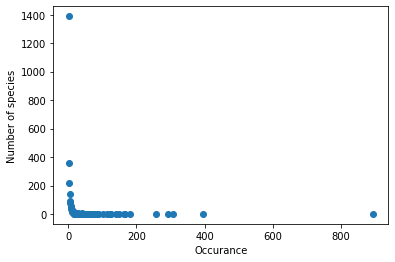

In [40]:
num_species = y.value_counts().value_counts().values
occurance = y.value_counts().value_counts().index
plt.scatter(occurance, num_species)
plt.xlabel('Occurance')
plt.ylabel("Number of species")

In [41]:
y.value_counts().describe()

count    2621.000000
mean        5.056085
std        24.039414
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       894.000000
dtype: float64

In [42]:
a = y.value_counts()
a.index = range(0, len(y.value_counts()+1))
a.index
a

0       894
1       394
2       308
3       291
4       258
       ... 
2616      1
2617      1
2618      1
2619      1
2620      1
Length: 2621, dtype: int64

No handles with labels found to put in legend.


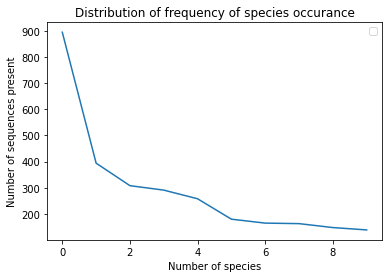

In [43]:
fig, ax = plt.subplots()
ax.plot(a.index[0:10], a.values[0:10])
ax.set(title="Distribution of frequency of species occurance")
plt.xlabel("Number of species")
plt.ylabel("Number of sequences present")
ax.legend()
plt.show()


## Raw sequence data analysis

In [44]:
from Bio import SeqIO
sequences = []
for seq_record in SeqIO.parse(r'C:\Users\anant\Documents\GitHub\Taxonomic_classifier\Data\sequence.fasta', 'fasta'):
    sequences.append(seq_record.seq)

In [45]:
size = [len(rec) for rec in sequences]

In [46]:
size[0:5]

[1503, 1503, 1525, 1524, 1524]

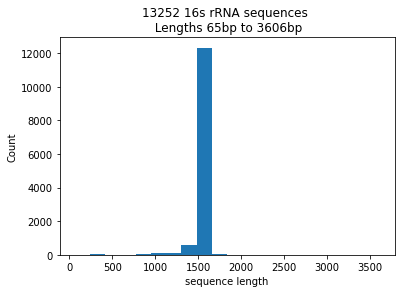

In [47]:

plt.hist(size, bins=20)
plt.title("%i 16s rRNA sequences \n Lengths %ibp to %ibp"%(len(size), min(size), max(size)))
plt.xlabel("sequence length")
plt.ylabel("Count")
plt.show()


In [48]:

gc_val = sorted(GC(content) for content in sequences)

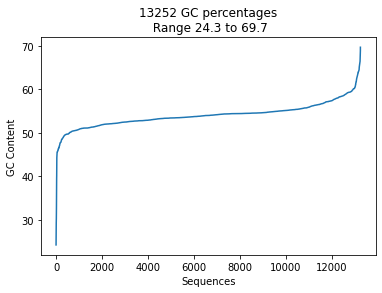

In [49]:
plt.plot(gc_val)
plt.title("%i GC percentages\n Range %0.1f to %0.1f" % (len(gc_val), min(gc_val), max(gc_val)))
plt.xlabel("Sequences")
plt.ylabel("GC Content")
plt.show()

# PCA

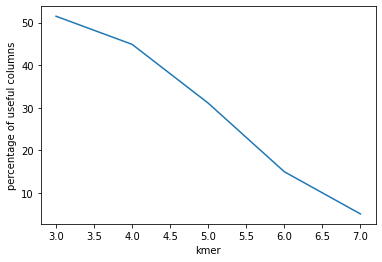

In [6]:
from matplotlib import pyplot as plt
x = [3,4,5,6,7]
y = [51.5, 44.9, 31.1, 15, 5.1]
plt.xlabel('kmer')
plt.ylabel('percentage of useful columns')
plt.xticks = x
plt.plot(x, y)